In [1]:
import cmath
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

%matplotlib widget
# Formatting for plots
label_font = {'fontname':'sans-serif', 'size':'20', 'color':'black', 'weight':'normal',
          'verticalalignment':'bottom'} 
title_font = {'fontname':'sans-serif', 'size':'16', 'color':'black', 'weight':'bold'}
legend_font = {'family':'sans-serif', 'size':'10', 'style':'normal'} 

def getSMatrix(data):
    s11 = np.asarray([10**(val[0]/20.)*cmath.exp(complex(0, val[1])) for val in zip(data['S11_Magnitude'], data['S11_Phase'])])
    s12 = np.asarray([10**(val[0]/20.)*cmath.exp(complex(0, val[1])) for val in zip(data['S12_Magnitude'], data['S12_Phase'])])
    s21 = np.asarray([10**(val[0]/20.)*cmath.exp(complex(0, val[1])) for val in zip(data['S21_Magnitude'], data['S21_Phase'])])
    s22 = np.asarray([10**(val[0]/20.)*cmath.exp(complex(0, val[1])) for val in zip(data['S22_Magnitude'], data['S22_Phase'])])

    return np.asarray([np.asarray([s11, s12]), np.asarray([s21, s22])])

Taking results from: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4734386

In [2]:
file12 = 'Port12_3Terminated.csv'
file13 = 'Port13_2Terminated.csv'
file23 = 'Port23_1Terminated.csv'

data12_3Term = pd.read_csv(file12)
data13_2Term = pd.read_csv(file13)
data23_1Term = pd.read_csv(file23)

allS12 = getSMatrix(data12_3Term)
allS13 = getSMatrix(data13_2Term)
allS23 = getSMatrix(data23_1Term)

freqs = np.asarray(data12_3Term['Frequency'])/1e6

interestingFreq = 750
interestingIndex = np.argmin(np.abs(freqs - interestingFreq))


interestingArr = [[allS12[row][col][interestingIndex] for col in range(len(allS12[row]))] for row in range(len(allS12))]

print('\nDATA FOR PORTS 1 AND 2, 3 TERMINATED\n')
for row in range(len(interestingArr)):
    colStr = ''
    for col in range(len(interestingArr[0])):
        colStr = colStr + (str(round(np.abs(interestingArr[row][col]), 6)) + '\t')
    colStr = colStr[:-1]
    print(colStr)


interestingArr = [[allS13[row][col][interestingIndex] for col in range(len(allS13[row]))] for row in range(len(allS13))]

print('\nDATA FOR PORTS 1 AND 3, 2 TERMINATED\n')
for row in range(len(interestingArr)):
    colStr = ''
    for col in range(len(interestingArr[0])):
        colStr = colStr + (str(round(np.abs(interestingArr[row][col]), 6)) + '\t')
    colStr = colStr[:-1]
    print(colStr)
    

interestingArr = [[allS23[row][col][interestingIndex] for col in range(len(allS23[row]))] for row in range(len(allS23))]

print('\nDATA FOR PORTS 2 AND 3, 1 TERMINATED\n')
for row in range(len(interestingArr)):
    colStr = ''
    for col in range(len(interestingArr[0])):
        colStr = colStr + (str(round(np.abs(interestingArr[row][col]), 6)) + '\t')
    colStr = colStr[:-1]
    print(colStr)    


# Just trying something. Assume that sa/sb/sc are 0...

'''
ra = sa / (1 - s11_m1*sa)
rb = sb / (1 - s22_m2*sb)
rc = sc / (1 - s33_m3*sc)

s11 = 0.5*(s11_m1 + s11_m2 - s13_m*s31_m*rc - s12_m*s21_m*rb)
s22 = 0.5*(s22_m1 + s22_m3 - s12_m*s21_m*ra - s23_m*s32_m*rc)
s33 = 0.5*(s33_m2 + s33_m3 - s13_m*s31_m*ra - s23_m*s32_m*rb)
s12 = s12_m - s13_m*s32_m*rc
s13 = s13_m - s12_m*s23_m*rb
s21 = s21_m - s23_m*s31_m*rc
s23 = s23_m - s21_m*s12_m*ra
s31 = s31_m - s32_m*s21_m*rb
s32 = s32_m - s31_m*s12_m*ra 
'''


s11 = 0.5*(allS12[0][0] + allS13[0][0])
s22 = 0.5*(allS12[1][1] + allS23[0][0])
s33 = 0.5*(allS13[1][1] + allS23[1][1])

s12 = allS12[0][1]
s13 = allS13[0][1]
s21 = allS12[1][0]
s23 = allS23[0][1]
s31 = allS13[1][0]
s32 = allS23[1][0]


totalSMatrix = np.asarray([np.asarray([s11, s12, s13]), np.asarray([s21, s22, s23]), np.asarray([s31, s32, s33])])
freqs = np.asarray(data12_3Term['Frequency'])/1e6

interestingFreq = 500
interestingIndex = np.argmin(np.abs(freqs - interestingFreq))

interestingArr = [[totalSMatrix[row][col][interestingIndex] for col in range(len(totalSMatrix[row]))] for row in range(len(totalSMatrix))]

print('\nATTEMPT AT 3 PORT MATRIX, TERMINATED THIRD PORT\n')
for row in range(len(interestingArr)):
    colStr = ''
    for col in range(len(interestingArr[0])):
        colStr = colStr + (str(round(20*np.log10(np.abs(interestingArr[row][col])), 6)) + '\t')
    colStr = colStr[:-1]
    print(colStr)








DATA FOR PORTS 1 AND 2, 3 TERMINATED

0.716555	0.218264
0.452198	0.697745

DATA FOR PORTS 1 AND 3, 2 TERMINATED

0.715511	0.423587
0.210946	0.733788

DATA FOR PORTS 2 AND 3, 1 TERMINATED

0.691276	0.232527
0.435589	0.726168

ATTEMPT AT 3 PORT MATRIX, TERMINATED THIRD PORT

-30.326755	-31.317191	-0.255377
-0.295439	-34.565623	-36.923499
-33.035497	-0.324251	-35.905648


In [7]:
data12_3Term.head()


,Frequency,S11_Magnitude,S11_Phase,S11_VSWR,S12_Magnitude,S12_Phase,S12_VSWR,S21_Magnitude,S21_Phase,S21_VSWR,S22_Magnitude,S22_Phase,S22_VSWR,Unnamed: 13
0,200000000,-2.167934,179.797812,8.054612,-7.613424,-85.183347,2.425981,-6.845830,-79.319733,2.667590,-2.240129,170.376846,7.797749,NaN
1,200200066,-2.166760,179.733085,8.058931,-7.624276,-85.364612,2.422934,-6.836576,-79.281115,2.670853,-2.241401,170.341414,7.793372,NaN
2,200400133,-2.166087,179.678058,8.061411,-7.620708,-85.404305,2.423935,-6.835871,-79.390938,2.671102,-2.235851,170.336827,7.812503,NaN
3,200600200,-2.170354,179.644159,8.045724,-7.631818,-85.441156,2.420821,-6.852270,-79.411630,2.665325,-2.233817,170.231803,7.819541,NaN
4,200800266,-2.166134,179.625712,8.061238,-7.618805,-85.533313,2.424469,-6.843883,-79.413935,2.668276,-2.232896,170.227825,7.822729,NaN


KeyError: (1, 1)

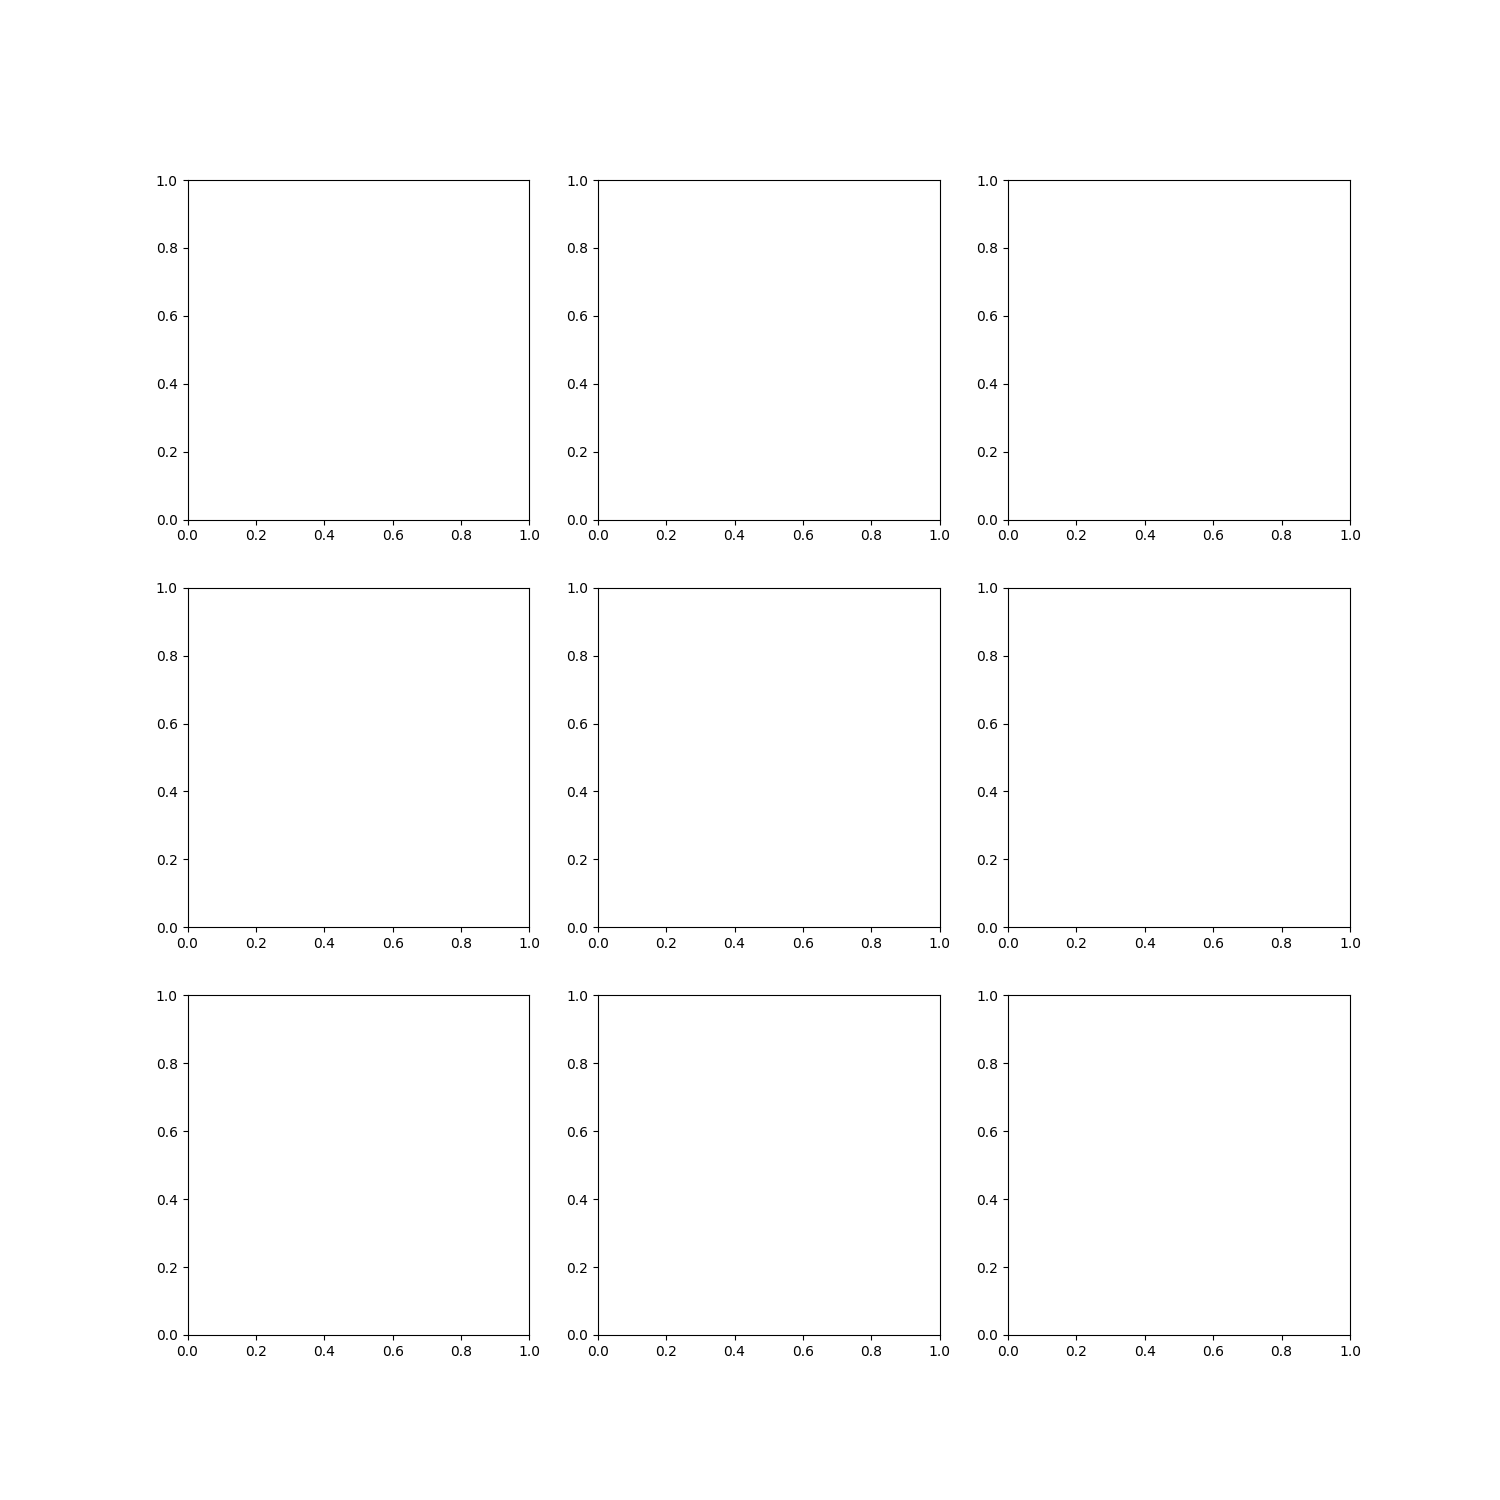

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping of dataframe names to port configurations
dataframes = {
    (1, 2): data12_3Term,  # S12 and S21 measured with Port 3 terminated
    (1, 3): data13_2Term,  # S13 and S31 measured with Port 2 terminated
    (2, 3): data23_1Term,  # S23 and S32 measured with Port 1 terminated
}

# Function to map VNA port numbers to circulator ports
def map_vna_ports_to_circulator_ports(vna_i, vna_j, config):
    """
    Maps the VNA port numbers (always 1 and 2) to the circulator ports
    based on the configuration. For example, in (1, 3) configuration,
    VNA port 1 corresponds to circulator port 1, and VNA port 2
    corresponds to circulator port 3.
    """
    circulator_ports = sorted(config)
    mapped_i = circulator_ports[vna_i - 1]
    mapped_j = circulator_ports[vna_j - 1]
    return mapped_i, mapped_j

# Plotting parameters
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
#fig.xlim(450,550)

# Labels for the subplots
port_labels = ['1', '2', '3']

# Loop over each subplot in a 3x3 grid
for row in range(3):
    for col in range(3):
        i = int(port_labels[row])
        j = int(port_labels[col])

        # Skip redundant self-measurements for Sii
        if i == j:
            continue

        # Determine the appropriate dataframe for S_ij
        config = tuple(sorted([i, j]))  # Find which 2-port configuration to use
        df = dataframes[config]  # Select the appropriate dataframe

        # Map circulator ports to VNA port labels
        if config == (1, 2):
            vna_i, vna_j = i, j
        elif config == (1, 3):
            vna_i, vna_j = (1, 2) if i == 1 else (2, 1)  # Map 1<->1 and 3<->2 for VNA labeling
        elif config == (2, 3):
            vna_i, vna_j = (1, 2) if i == 2 else (2, 1)  # Map 2<->1 and 3<->2 for VNA labeling

        # Map VNA port labels to circulator ports
        circulator_i, circulator_j = map_vna_ports_to_circulator_ports(vna_i, vna_j, config)

        # Create plot for Sij
        frequency = df['Frequency'] / 1e6  # Convert frequency to MHz
        sij_dB = df[f'S{vna_i}{vna_j}_Magnitude']  # Directly use dB values as provided

        # Plot Sij in dB vs. frequency
        axes[row, col].plot(frequency, sij_dB, label=f'S{circulator_i}{circulator_j}', color='b')
        axes[row, col].set_title(f'S{circulator_i}{circulator_j} (dB) vs Frequency')
        axes[row, col].set_xlabel('Frequency (MHz)')
        axes[row, col].set_ylabel('Magnitude (dB)')
        axes[row, col].grid()
        axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


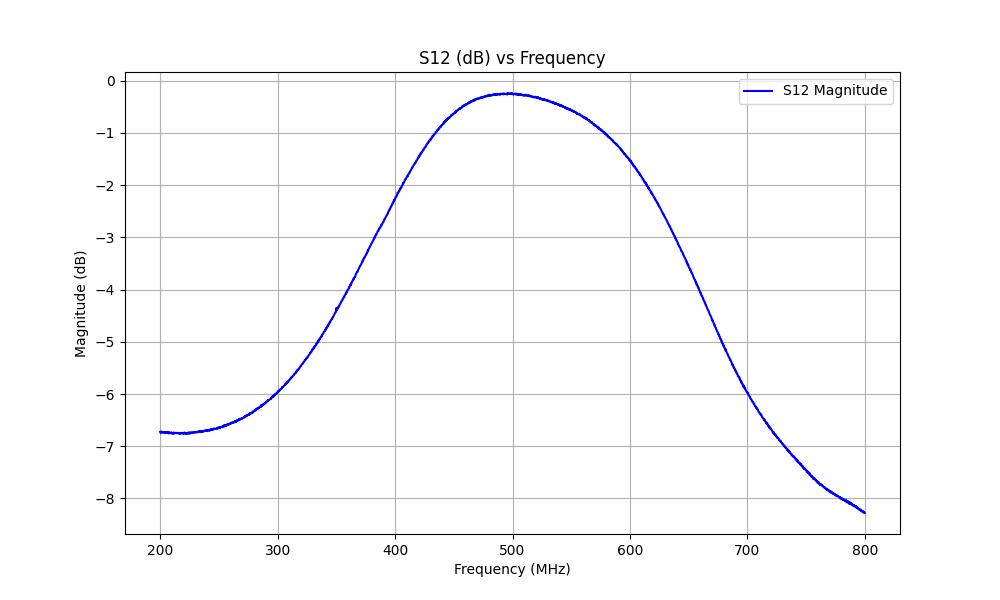

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_single_sij(file_path, sij):
    """
    Plots the specified S-parameter (Sij) from the given file.
    
    Args:
    - file_path: Path to the CSV file containing the measurement data.
    - sij: The S-parameter to plot (e.g., "S21" or "S11").
    """
    # Read the data from the specified file
    df = pd.read_csv(file_path)
    
    # Construct the column name for the magnitude
    magnitude_column = f"{sij}_Magnitude"
    
    # Check if the column exists in the dataframe
    if magnitude_column not in df.columns:
        print(f"Error: Column {magnitude_column} not found in the file.")
        return

    # Plotting the S-parameter magnitude vs. frequency
    plt.figure(figsize=(10, 6))
    plt.plot(df['Frequency'] / 1e6, df[magnitude_column], label=f'{sij} Magnitude', color='b')
    plt.title(f'{sij} (dB) vs Frequency')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# Replace with your desired file path and S-parameter (e.g., "S21")
file_path = "Port13_2Terminated.csv"
sij = "S12"

# Plot the specified S-parameter from the given file
plot_single_sij(file_path, sij)


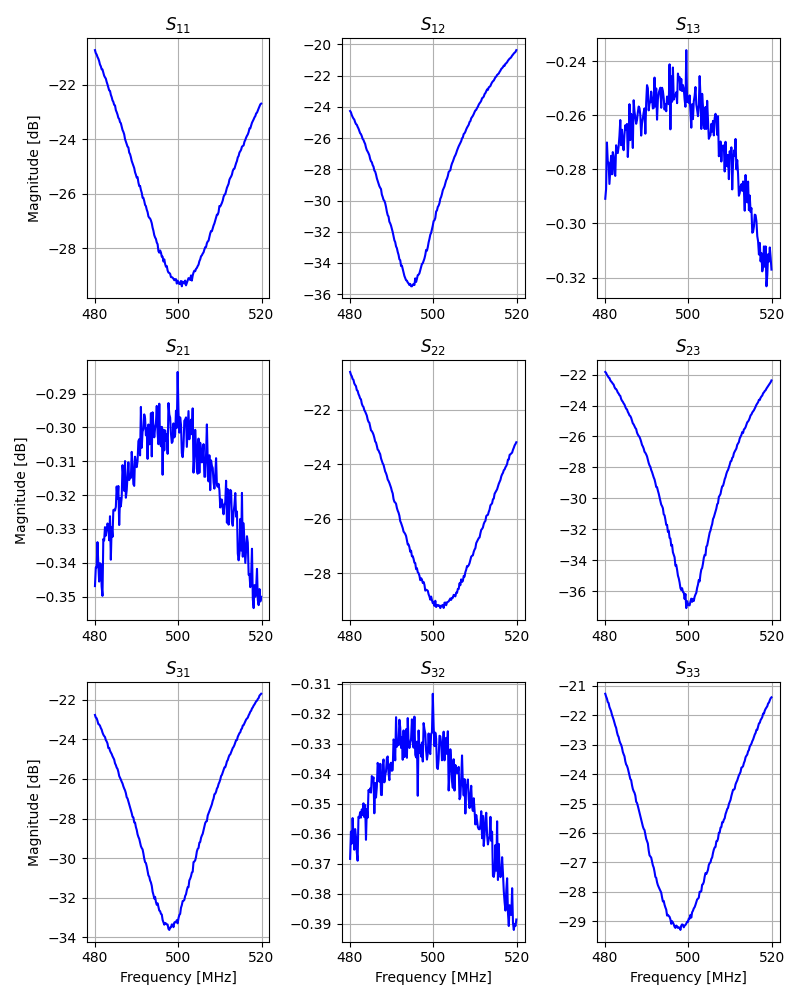

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')

# Assuming the dataframes are already defined: data12_3Term, data13_2Term, data23_1Term

# Dictionary mapping configurations to dataframes
dataframes = {
    (1, 2): data12_3Term,  # S12 and S21 measured with Port 3 terminated
    (1, 3): data13_2Term,  # S13 and S31 measured with Port 2 terminated
    (2, 3): data23_1Term,  # S23 and S32 measured with Port 1 terminated
}

# Define the frequency range in Hz
min_frequency = 480e6  # 475 MHz
max_frequency = 520e6  # 525 MHz

# Function to filter data within the desired frequency range
def filter_data(df, min_freq, max_freq):
    return df[(df['Frequency'] >= min_freq) & (df['Frequency'] <= max_freq)]

# Plotting parameters
fig, axes = plt.subplots(3, 3, figsize=(8, 10))

# Labels for the subplots
port_labels = ['1', '2', '3']

# Helper function to get the correct S-parameter column name based on circulator port indices
def get_sij_column_name(i, j, config):
    """
    Given circulator ports i, j and a 2-port configuration, return the corresponding
    S-parameter column name for the dataframe based on VNA labeling convention.
    """
    circulator_ports = sorted(config)
    vna_i = 1 if i == circulator_ports[0] else 2
    vna_j = 1 if j == circulator_ports[0] else 2
    return f'S{vna_i}{vna_j}_Magnitude'

# Loop over each subplot in a 3x3 grid
for row in range(3):
    for col in range(3):
        i = int(port_labels[row])  # Circulator port i
        j = int(port_labels[col])  # Circulator port j

        # Handle diagonal elements (S11, S22, S33)
        if i == j:
            # Choose a consistent dataframe for each diagonal element
            if i == 1:
                df = filter_data(data12_3Term, min_frequency, max_frequency)  # Use filtered data12_3Term for S11
                sij_column = 'S11_Magnitude'
            elif i == 2:
                df = filter_data(data12_3Term, min_frequency, max_frequency)  # Use filtered data12_3Term for S22
                sij_column = 'S22_Magnitude'
            elif i == 3:
                df = filter_data(data23_1Term, min_frequency, max_frequency)  # Use filtered data23_1Term for S33
                sij_column = 'S22_Magnitude'  # Because VNA's 2nd port corresponds to Port 3 for S33

        else:
            # For off-diagonal elements, select the appropriate dataframe and column
            config = tuple(sorted([i, j]))  # Configuration tuple for the 2-port measurement
            df = filter_data(dataframes[config], min_frequency, max_frequency)  # Filter the appropriate dataframe
            sij_column = get_sij_column_name(i, j, config)  # Get the Sij column name for the dataframe

        # Extract frequency and S-parameter magnitude (dB values are already given)
        frequency = df['Frequency'] / 1e6  # Convert frequency to MHz for readability
        sij_dB = df[sij_column]

        # Plot Sij in dB vs. frequency
        axes[row, col].plot(frequency, sij_dB, label=f'S{i}{j}', color='b')
        axes[row, col].set_title(f'$S_{{{i}{j}}}$')
        #axes[row, col].plot(frequency, sij_dB, label=f'$S_{{{i}{j}}}$', color='b')
        if row == 2: 
            axes[row, col].set_xlabel('Frequency [MHz]')
        if col == 0:
            axes[row, col].set_ylabel('Magnitude [dB]')
        axes[row, col].grid()
        #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
